### <span style="color:green">Task 1</span>

Данное утверждение входит в теорему Колмогорова. Докажем его. 

Пусть $|\mathbb{X}| = n$. Построим вспомогательную выборку $\mathbb{Y}$ следующим образом:

$$\forall i \in \{1,..,n\}~Y_i = F(X_i)$$

Тогда такие случайные величины будут независимыми и будут иметь равномерное непрерывное распределение $U(0, 1)$:

$$\forall y \in (0, 1)~P(Y_i \le y) = P(F(X_i) \le y) = P(X_i \le F^{-1}(y)) = F(F^{-1}(y)) = y,$$ где $F^{-1}(y) = min\{t: F(t) = y\}$.

Теперь заметим, что с вероятностью $1$ для всех $x \in \mathbb{R}$
$$\mathbb{1}(X_i \le x) = \mathbb{1}(F(X_i) \le F(x))$$

Из этого с вероятностью $1$ будет выполняться:

$$D_n = \sup_x|F(x) - F_n(x)| = \sup_x\left|F(x) - \frac{\sum_{i=1}^n \mathbb{1}(X_i \le x)}{n}\right| = \sup_x\left|F(x) - \frac{\sum_{i=1}^n \mathbb{1}(Y_i \le F(x))}{n}\right| = \sup_{y \in (0, 1)}\left|y - \frac{\sum_{i=1}^n \mathbb{1}(Y_i \le y)}{n}\right|$$

Наглядно видно, что распределение $D_n$ не зависит от $F$.

### <span style="color:green">Task 2</span>

Для тестирования гипотез воспользуемся встроенными функциями модуля *stats* библиотеки *scipy*:

(a)

In [13]:
import pandas as pd
from scipy import stats


def test_result(test, significance_level=0.05):
    if test.pvalue <= significance_level:
        print("H0 is rejected")
    else:
        print("H0 is not rejected")
        

data = pd.read_csv('IB_statistics_data_HW1.5.txt', sep=' ')

test_result(stats.kstest(data['Ex2a'], stats.uniform.cdf, args=(0, 42)))

H0 is not rejected


(b)

In [14]:
test_result(stats.kstest(data['Ex2b'], stats.expon.cdf, args=(7,)))

H0 is rejected


(c)

In [15]:
test_result(stats.kstest(data['Ex2c'], stats.norm.cdf, args=(0, 1)))

H0 is not rejected


### <span style="color:green">Task 3</span>

(a) Биномиальный тест.

Рассмотрим случай двусторонней критической области:

$H_0: \theta = 0.8\\H_1: \theta \ne 0.8$

За статистику критерия возьмём $S_n = \sum_{i=1}^n X_i \sim Bin(n, \theta)$ — число успехов в $n$ независимых испытаниях, где $n$ — размер выборки. Если нулевая гипотеза верна, то $\mathbb{E}S_n = 0.8n$.

Для рассчёта $p$-значения (вероятности получить такое же или более экстремальное значение статистики, по сравнению с ранее наблюдаемым, при условии, что нулевая гипотеза верна) воспользуемся следующей достаточно очевидной формулой:

$$p = \sum_{i \in \mathcal{I}} P(S_n = i|H_0),$$

где $\mathcal{I} = \{i: P(S_n = i|H_0) \le P(S_n=\sum_{i=1}^n X_i|H_0)\}$ — числа успехов, такие же или менее вероятные, чем наблюдаемое число успехов (по сути, сумма значений выборки) при условии, что нулевая гипотеза верна.

Реализация данного теста есть во всём том же пакете *scipy*:

In [16]:
X3a = data['Ex3a']

test_result(stats.binomtest(sum(X3a), len(X3a), 0.8))

H0 is not rejected


(b) Биномиальный тест (?)

Снова рассмотрим случай двусторонней критической области:

$H_0: \theta = 0.8\\H_1: \theta \ne 0.8$

За статистику критерия на этот раз так же возьмём $S = \sum_{i=1}^n X_i \sim Bin(mn, \theta) = Bin(12n, \theta)$, где $n$ — размер выборки. Если нулевая гипотеза верна, то $\mathbb{E}S = 0.8nm = 9.6n$.

Для рассчёта $p$-значения воспользуемся вновь формулой из предыдущего пункта:

$$p = \sum_{i \in \mathcal{I}} P(S = i|H_0),$$

где $\mathcal{I} = \{i: P(S = i|H_0) \le P(S=\sum_{i=1}^n X_i|H_0)\}$.

In [17]:
X3b = data['Ex3b']
X3b_n = len(X3b)

m = 12

test_result(stats.binomtest(sum(X3b), m*X3b_n, 0.8))

H0 is rejected


Посмотрим на функцию вероятности интересующего нас распределения при условии выполнения нулевой гипотезы и на эмпирические частоты из нашей выборки:

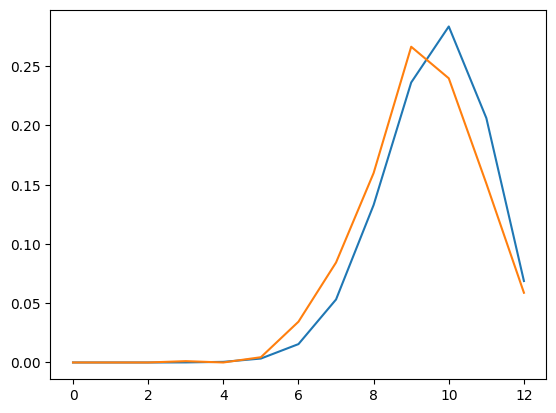

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x_space = np.arange(m+1)
emp_freq = np.zeros(m+1)

for x in X3b:
    emp_freq[x] += 1

plt.plot(x_space, stats.binom.pmf(x_space, m, 0.8))
plt.plot(x_space, emp_freq/X3b_n)
plt.show()

Видим, что расхождения всё-таки достаточно существенные, и действительно вряд ли здесь была совершена ошибка первого рода.

Попробуем рассмотреть более реалистичное значение параметра: 0.77.

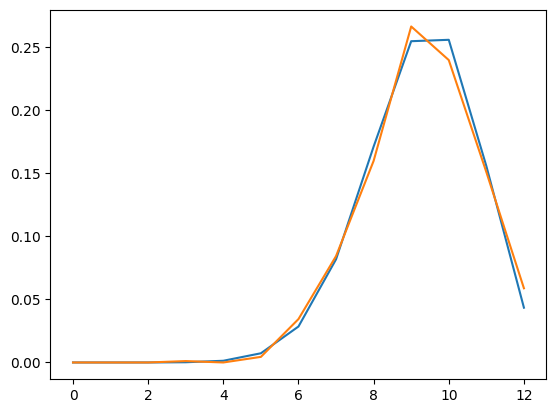

In [19]:
plt.plot(x_space, stats.binom.pmf(x_space, m, 0.77))
plt.plot(x_space, emp_freq/X3b_n)
plt.show()

В этом случае расхождения не такие сильные. Посмотрим, как ведёт себя критерий:

In [20]:
test_result(stats.binomtest(sum(X3b), m*X3b_n, 0.77))

H0 is not rejected


При таком тесте отвергнуть нулевую гипотезу с данным уровнем значимости уже нет оснований.

(с)

Снова рассмотрим случай двусторонней критической области:

$H_0: \theta = 0.8\\H_1: \theta \ne 0.8$

За статистику критерия на этот раз возьмём минимальное значение выборки $X_{min} = \min_{i \in \{1,...,n\}} X_i \sim Geom(1-(1-\theta)^n)$, где $n$ — размер выборки.
Конкретное значение, посчитанное по выборке, обозначим как $x_{min}$.

$p$-значение в данном случае рассчитать очень просто, если мы взглянем на вид функции вероятности геометрического распределения:

$$p = P(X_{min} \ge x_{min}|H_0) = (1-(1-(1-0.8)^n))^{x_{min}} = 0.2^{nx_{min}}$$

In [28]:
X3c = data['Ex3c']

print(f"p-value: {0.2**(len(X3c)*min(X3c))}")

p-value: 1.0


В данном тесте отклонить нулевую гипотезу у нас оснований нет.

В принципе можно использовать и другой критерий, аналогичный двум предыдущим (там сумма значений выборки будет иметь уже отрицательное биномиальное распределение с параметрами $n$ и $\theta$), но я так и не понял, как там можно грамотно посчитать $p$-значение в общем случае.

### <span style="color:green">Task 4</span>

Переформулируем нулевую гипотезу:

$H_0: F(x) = F_0(x) \equiv \int_{-\infty}^x p_\xi(t)dt \equiv \int_0^x 5t^4dt \equiv x^5$ для $x \in [0, 1]$.

Соответственно альтернативная гипотеза будет иметь вид:

$H_1: F(x) \ne  F_0(x) \equiv x^5$ для $x \in [0, 1]$.

Сперва проверим, что все значения в выборке лежат в нужном нам диапазоне (это упростит задание функции распределения):

In [71]:
X4 = data['Ex4']

assert all(0 <= x <= 1 for x in X4)

Ошибок нет. Тогда воспользуемся уже знакомым критерием Колмогорова-Смирнова:

In [76]:
test_result(stats.kstest(X4, lambda x: x**5))

H0 is rejected


Посмотрим на функцию плотности интересующего нас распределения при условии выполнения нулевой гипотезы и на гистограмму частот из нашей выборки:

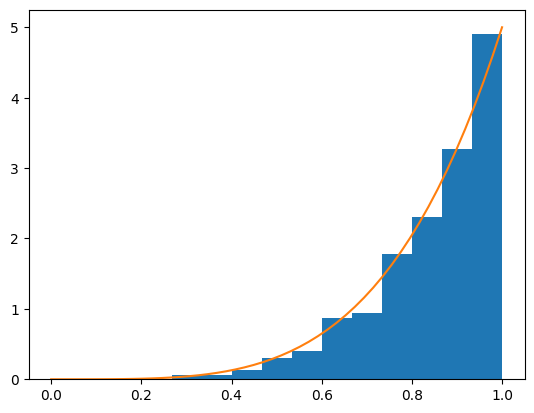

In [77]:
x_space = np.linspace(0.0, 1.0)

plt.hist(X4, bins='sturges', density=True)
plt.plot(x_space, 5*x_space**4)
plt.show()

### <span style="color:green">Task 5</span>

Имеем смесь непрерывных распределений, т. е. другое непрерывное распределение. Следовательно, можем применить критерий Колмогорова-Смирнова:

In [98]:
X5 = data['Ex5']

def mixture_cdf(x):
    return 0.5*stats.norm(-1, 1).cdf(x) + 0.5*stats.norm(1, 1).cdf(x)

test_result(stats.kstest(X5, mixture_cdf))

H0 is not rejected


Посмотрим на функцию плотности интересующего нас распределения при условии выполнения нулевой гипотезы и на гистограмму частот из нашей выборки:

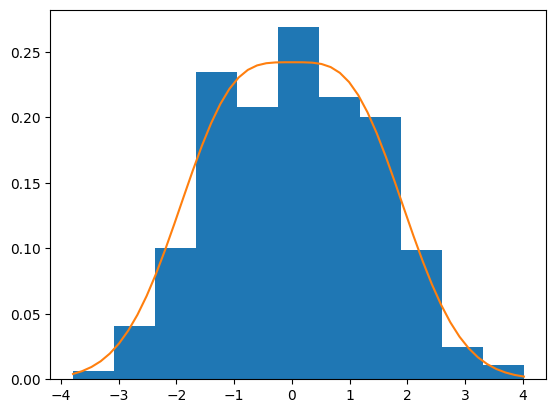

In [115]:
x_space = np.linspace(min(X5), max(X5))

plt.hist(X5, bins='sturges', density=True)
plt.plot(x_space, 0.5*stats.norm(-1, 1).pdf(x_space) + 0.5*stats.norm(1, 1).pdf(x_space))
plt.show()

### <span style="color:green">Task 6</span>

Имеем смесь распределений, которая уже не будет являться непрерывным распределением, поэтому критрий Колмогорова-Смирнова применить уже нельзя.

Совершенно естественно будет воспользоваться в данном случае комбинированным критерием, состоящим из трёх частей:

1. Первая часть определяет суммарную долю нулей и единиц в выборке и применяет биномиальный тест (0 и 1 условно считаем за единицы, а остальные значения за 0, и проверяем $H_0: p = \frac{1}{3}$).
2. Вторая часть применяет к подвыборке из нулей и единиц биномиальный тест и проверяет $H_0: p = \frac{1}{2}$.
3. Третья часть применяет критерий Колмогорова-Смирнова к оставшейся подвыборке.

Статистики для всех трёх частей критерия независимы, поэтому можем спокойно применять следующее правило:

Если $p$-значение хотя бы для одной из частей меньше или равно $\sqrt[3]{0.05}$, то мы отвергаем нулевую гипотезу.

In [147]:
X6 = data['Ex6']
X6_n = len(X6)

num0 = 0
num1 = 0
for x in X6:
    if x == 0:
        num0 += 1
    elif x == 1:
        num1 += 1
        
num01 = num0 + num1
        
alpha = np.cbrt(0.05)
    
# part 1
p1 = stats.binomtest(num01, X6_n, 1/3).pvalue

# part 2
p2 = stats.binomtest(num1, num01, 1/2).pvalue

# part 3
p3 = stats.kstest(X6[(X6 != 0) & (X6 != 1)], stats.uniform.cdf, args=(0, 1)).pvalue

if any((p1 <= alpha, p2 <= alpha, p3 <= alpha)):
    print("H0 is rejected")
else:
    print("H0 is not rejected")
    
print(f"p1: {p1}, p2: {p2}, p3: {p3}, alpha: {alpha}")

H0 is rejected
p1: 1.4379721576696093e-08, p2: 0.7981285251985665, p3: 0.36547778028957356, alpha: 0.3684031498640387


### Не уверен, что я всё сделал правильно, но я это сделал!